# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
from scipy import stats as st
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv ('/datasets/megaline_messages.csv')
df_plans = pd. read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')


## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

In [3]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [4]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [5]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [6]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [7]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


## Tarifas

In [8]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [9]:
# Imprime una muestra de los datos para las tarifas
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


La verdad es que no encontre un dataframe llamado tarifas como tal solo el que se llama plan que tiene un contenido sobre tarifas, en este data se puede observar que te muestra los nombres de los planes junto con sus tarifas que es lo que incluye como por ejemplos los megabytes por mes, los minutos ingcluidos por mes y los mensajes, tambien muestra el costo del plan por mes y el costo de los servicios en caso que te llegues a acceder como por ejemplo se te cobraran 10 dolares por cada gb excedido.Hasta el momento los datos se ven bien esperemos que con el paso del proyecto siga siendo así.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

Hasta el momento no veo datos que corregir

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Usuarios/as

In [10]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [11]:
# Imprime una muestra de datos para usuarios
df_users.head(15)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


En seguimiento a la información general se puede observar que hay registrados 500 registros en  8 columnas de la cual solo la columna churn_date tiene 34 valores no nulos esto se pudiera interpretar y a lo que nos dice el diccionario que cuando se realizo el corte del servicio todavia estaba activo. Otra de las cuestiones que se en la columna reg_date y churn_date viene como tipo de dato object y considero que hay que cambiarlos por data time por que se manejan fechas y así para evitar problemas despues, y por ultimo checar si no hay algun duplicado.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [12]:
df_users.duplicated().sum()

0

In [13]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriquecer los datos

Pudiera ser que en transcurso del proyecto me pudiera servir saber que cuantos usuarios tiene cada plan, darnos una idea que tipo de plan es el mas utilizado

In [14]:
usuarios_plan = df_users['plan'].value_counts()
usuarios_plan

surf        339
ultimate    161
Name: plan, dtype: int64

## Llamadas

In [15]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [16]:
# Imprime una muestra de datos para las llamadas
df_calls.head(15)


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


En el dataframe de llamadas 137735 entradas con 5 columnas de las cuales en las en ninguna de las columnas hay valores no nulos en el caso de este data tambien se puede observar que los nombres de las columnas todos se encuentran en minusculas y estan bien definidos por sus _ para un mejor analisis, en este data considero que tambien la fecha deberia de cambiarse por data time. Solo verificar si hay duplicados.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [17]:
df_calls.duplicated().any()

False

In [18]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

A lo mejor en algun punto para la hora de hacer los calculos para las conversiones nos pudiera ayudar el saber el número de llamadas por usuario

In [19]:
calls_users = df_calls.groupby('user_id')['id'].count().reset_index()
calls_users.columns = ['user_id', 'n_llamadas']
calls_users

,user_id,n_llamadas
0,1000,16
1,1001,261
2,1002,113
3,1003,149
4,1004,370
...,...,...
476,1495,253
477,1496,195
478,1497,54
479,1498,451


## Mensajes

In [20]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [21]:
# Imprime una muestra de datos para los mensajes
df_messages.head(10)


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


En el dataframe de mensajes tiene 76051 entradas con 3 columnas de las cuales en las en ninguna de las columnas hay valores no nulos en el caso de este data tambien se puede observar que los nombres de las columnas todos se encuentran en minusculas y estan bien definidos por sus _ para un mejor analisis, en este data considero que tambien la fecha deberia de cambiarse por data time. Solo verificar si hay duplicados.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [22]:
df_messages.duplicated().any()

False

In [23]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [24]:
# Agrupar y analizar comportamiento mensual:
df_messages['month'] = df_messages['message_date'].dt.month
df_messages

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
...,...,...,...,...
76046,1497_526,1497,2018-12-24,12
76047,1497_536,1497,2018-12-24,12
76048,1497_547,1497,2018-12-31,12
76049,1497_558,1497,2018-12-24,12


## Internet

In [25]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [26]:
# Imprime una muestra de datos para el tráfico de internet
df_internet.head(15)


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


En el dataframe de Internet tiene 104825 entradas con 4 columnas de las cuales en las en ninguna de las columnas hay valores no nulos en el caso de este data tambien se puede observar que los nombres de las columnas todos se encuentran en minusculas y estan bien definidos por sus _ para un mejor analisis, en este data considero que tambien la fecha deberia de cambiarse por data time. Solo verificar si hay duplicados.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [27]:
df_internet.duplicated().any()

False

In [28]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [29]:
#Convertir los megabytes usados por gb
df_internet['GB'] = df_internet['mb_used']/1024
df_internet

,id,user_id,session_date,mb_used,GB
0,1000_13,1000,2018-12-29,89.86,0.087754
1,1000_204,1000,2018-12-31,0.00,0.000000
2,1000_379,1000,2018-12-28,660.40,0.644922
3,1000_413,1000,2018-12-26,270.99,0.264639
4,1000_442,1000,2018-12-27,880.22,0.859590
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,0.212949
104821,1499_216,1499,2018-12-30,304.72,0.297578
104822,1499_217,1499,2018-09-22,292.75,0.285889
104823,1499_218,1499,2018-12-07,0.00,0.000000


In [30]:
#usuarios utilizaron mas de 1 gb
gb = df_internet[df_internet['mb_used'] >= 1024]
gb

,id,user_id,session_date,mb_used,GB
17,1001_29,1001,2018-10-09,1067.99,1.042959
81,1001_151,1001,2018-10-19,1123.93,1.097588
108,1001_199,1001,2018-12-18,1119.44,1.093203
112,1001_210,1001,2018-09-19,1174.73,1.147197
125,1001_228,1001,2018-11-09,1049.78,1.025176
...,...,...,...,...,...
104354,1498_427,1498,2018-10-18,1068.56,1.043516
104676,1499_71,1499,2018-10-16,1039.08,1.014727
104695,1499_90,1499,2018-12-22,1444.97,1.411104
104733,1499_128,1499,2018-11-18,1232.86,1.203965


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [31]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
df_plans.head()



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


No entendí muy bien la instruccion si a lo que se referia es esto pero en este datraframe podemos observar las tarifas lo que se debe de pagar por mes ya sea en el plan surf que son 20 (dolares) o en el plan ultimate 70 (dolares), por cada minuto extra en el plan surf se le cobra 3 centavos al igual por el mensajes extra y por cada gb extra te cobran 10 dolares en el caso del plan ultimate por cada minuto extra se le cobra 1 centavos al igual por el mensajes extra y por cada gb extra te cobran $7

## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [32]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
df_calls['month'] = pd.to_datetime(df_calls['call_date']).dt.month

llamadas= df_calls.pivot_table(
              index = ['user_id', 'month'],
              values= 'duration',
              aggfunc= ['count']
)

llamadas.columns = ['n_llamadas']
llamadas= llamadas.reset_index()
llamadas



,user_id,month,n_llamadas
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [33]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
n_minutos= df_calls.pivot_table(
              index = ['user_id', 'month'],
              values= 'duration',
              aggfunc= ['sum']
)

n_minutos.columns = ['minutos_usados']
n_minutos = n_minutos.reset_index()
n_minutos


,user_id,month,minutos_usados
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59
...,...,...,...
2253,1498,12,324.77
2254,1499,9,330.37
2255,1499,10,363.28
2256,1499,11,288.56


In [34]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
# Extraer mes
df_messages['month'] = pd.to_datetime(df_messages['message_date']).dt.month

#Agrupar por usuario y mes
n_msj = df_messages.groupby(['user_id','month'])['id'].count().reset_index()
n_msj = n_msj.rename(columns={'id': 'n_msj'})
n_msj = n_msj.fillna(0)
n_msj

,user_id,month,n_msj
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [35]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
df_internet['month'] = pd.to_datetime(df_internet['session_date']).dt.month
internet= df_internet.pivot_table(
              index = ['user_id','month'],
              values= 'mb_used',
              aggfunc= ['sum']
)

internet.columns = ['mb_usados']
internet = internet.reset_index()
internet


,user_id,month,mb_usados
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [36]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
fusion_1= pd.merge(llamadas, n_msj)
fusion_2 = pd.merge(fusion_1, n_minutos)
tabla_final = pd.merge(fusion_2,internet)
tabla_final

,user_id,month,n_llamadas,n_msj,minutos_usados,mb_usados
0,1000,12,16,11,116.83,1901.47
1,1001,8,27,30,171.14,6919.15
2,1001,9,49,44,297.69,13314.82
3,1001,10,65,53,374.11,22330.49
4,1001,11,64,36,404.59,18504.30
...,...,...,...,...,...,...
1754,1496,9,52,21,389.94,16389.27
1755,1496,10,46,18,301.16,14287.36
1756,1496,11,39,13,291.88,8547.36
1757,1496,12,40,11,278.61,16438.99


In [37]:
# Añade la información de la tarifa
paso1 = df_users.merge( df_plans, left_on='plan', right_on='plan_name',how='left')
paso1.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000,30720,3000,70,7,0.01,0.01,ultimate
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT,50,15360,500,20,10,0.03,0.03,surf


In [38]:
paso_2 = pd.merge(tabla_final,paso1)
paso_2.head(10)

,user_id,month,n_llamadas,n_msj,minutos_usados,mb_usados,first_name,last_name,age,city,...,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12,16,11,116.83,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,8,27,30,171.14,6919.15,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
2,1001,9,49,44,297.69,13314.82,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
3,1001,10,65,53,374.11,22330.49,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
4,1001,11,64,36,404.59,18504.30,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
5,1001,12,56,44,392.93,19369.18,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
6,1002,10,11,15,54.13,6552.01,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
7,1002,11,55,32,359.76,19345.08,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
8,1002,12,47,41,363.24,14396.24,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
9,1003,12,149,50,1041.00,27044.14,Reynaldo,Jenkins,52,"Tulsa, OK MSA",...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf


In [39]:
tarifa_añadida= paso_2.pivot_table(
              index = ['user_id', 'month','plan'],
              values= ['usd_monthly_pay','n_llamadas','n_msj','minutos_usados',	'mb_usados'],
)

tarifa_añadida = tarifa_añadida.rename(columns ={'usd_monthly_pay': 'pago por mes'})
tarifa_añadida.head(10)

mb_usados  minutos_usados  n_llamadas  n_msj  \
user_id month plan                                                     
1000    12    ultimate    1901.47          116.83          16     11   
1001    8     surf        6919.15          171.14          27     30   
        9     surf       13314.82          297.69          49     44   
        10    surf       22330.49          374.11          65     53   
        11    surf       18504.30          404.59          64     36   
        12    surf       19369.18          392.93          56     44   
1002    10    surf        6552.01           54.13          11     15   
        11    surf       19345.08          359.76          55     32   
        12    surf       14396.24          363.24          47     41   
1003    12    surf       27044.14         1041.00         149     50   

                        pago por mes  
user_id month plan                    
1000    12    ultimate            70  
1001    8     surf                20  
        9     surf                20  
        10    surf                20  
        11    surf                20  
        12    surf                20  
1002    10    surf                20  
        11    surf                20  
        12    surf                20  
1003    12    surf                20

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [40]:
# Calcula el ingreso mensual para cada usuario

# Agrupar por usuario y mes
llamadas = df_calls.groupby(['user_id', 'month'])['duration'].sum().apply(np.ceil).reset_index(name='minutos_usados')
mensajes = df_messages.groupby(['user_id', 'month'])['id'].count().reset_index(name='n_msj')
internet = df_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name='mb_usados')


In [41]:
# Merge paso a paso
df_uso = pd.merge(llamadas, mensajes, on=['user_id', 'month'], how='outer')
df_uso = pd.merge(df_uso, internet, on=['user_id', 'month'], how='outer')
df_uso = df_uso.fillna(0)  # Rellenar valores faltantes con 0

# Agregar plan de cada usuario
df_uso = pd.merge(df_uso, df_users[['user_id', 'plan']], on='user_id', how='left')

# Agregar condiciones del plan
df_uso = pd.merge(df_uso, df_plans, left_on='plan', right_on='plan_name', how='left')
df_uso


,user_id,month,minutos_usados,n_msj,mb_usados,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12,117.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,8,172.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,surf
2,1001,9,298.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,surf
3,1001,10,375.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,surf
4,1001,11,405.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,surf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,61.0,13039.91,surf,50,15360,500,20,10,0.03,0.03,surf
2289,1361,5,0.0,2.0,1519.69,surf,50,15360,500,20,10,0.03,0.03,surf
2290,1482,10,0.0,2.0,0.00,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
2291,1108,12,0.0,0.0,233.17,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate


In [42]:
# Calcular excedentes
df_uso['minutos_extra'] = np.maximum(0, df_uso['minutos_usados'] - df_uso['minutes_included'])
df_uso['mensajes_extra'] = np.maximum(0, df_uso['n_msj'] - df_uso['messages_included'])
df_uso['mb_extra'] = np.maximum(0, df_uso['mb_usados'] - df_uso['mb_per_month_included'])
df_uso['gb_extra'] = np.ceil(df_uso['mb_extra'] / 1024)
df_uso

,user_id,month,minutos_usados,n_msj,mb_usados,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,minutos_extra,mensajes_extra,mb_extra,gb_extra
0,1000,12,117.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,0.0,0.0,0.00,0.0
1,1001,8,172.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,surf,0.0,0.0,0.00,0.0
2,1001,9,298.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,surf,0.0,0.0,0.00,0.0
3,1001,10,375.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,surf,0.0,3.0,6970.49,7.0
4,1001,11,405.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,surf,0.0,0.0,3144.30,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,61.0,13039.91,surf,50,15360,500,20,10,0.03,0.03,surf,0.0,11.0,0.00,0.0
2289,1361,5,0.0,2.0,1519.69,surf,50,15360,500,20,10,0.03,0.03,surf,0.0,0.0,0.00,0.0
2290,1482,10,0.0,2.0,0.00,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,0.0,0.0,0.00,0.0
2291,1108,12,0.0,0.0,233.17,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,0.0,0.0,0.00,0.0


In [43]:
# Calcular el ingreso mensual por usuario
df_uso['costo_total'] = (
    df_uso['usd_monthly_pay'] +
    df_uso['minutos_extra'] * df_uso['usd_per_minute'] +
    df_uso['mensajes_extra'] * df_uso['usd_per_message'] +
    df_uso['gb_extra'] * df_uso['usd_per_gb']
).round(2)

# Resultado final
print(df_uso[['user_id', 'month', 'plan', 'costo_total']].head(15))

    user_id  month      plan  costo_total
0      1000     12  ultimate        70.00
1      1001      8      surf        20.00
2      1001      9      surf        20.00
3      1001     10      surf        90.09
4      1001     11      surf        60.00
5      1001     12      surf        60.00
6      1002     10      surf        20.00
7      1002     11      surf        60.00
8      1002     12      surf        20.00
9      1003     12      surf       156.23
10     1004      5      surf        20.00
11     1004      6      surf        80.00
12     1004      7      surf       110.00
13     1004      8      surf       150.00
14     1004      9      surf        60.00


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

In [44]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
tabla_final


,user_id,month,n_llamadas,n_msj,minutos_usados,mb_usados
0,1000,12,16,11,116.83,1901.47
1,1001,8,27,30,171.14,6919.15
2,1001,9,49,44,297.69,13314.82
3,1001,10,65,53,374.11,22330.49
4,1001,11,64,36,404.59,18504.30
...,...,...,...,...,...,...
1754,1496,9,52,21,389.94,16389.27
1755,1496,10,46,18,301.16,14287.36
1756,1496,11,39,13,291.88,8547.36
1757,1496,12,40,11,278.61,16438.99


In [45]:
user_1 = df_users[['user_id', 'city',	'plan']]
user_1

,user_id,city,plan
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1002,"Las Vegas-Henderson-Paradise, NV MSA",surf
3,1003,"Tulsa, OK MSA",surf
4,1004,"Seattle-Tacoma-Bellevue, WA MSA",surf
...,...,...,...
495,1495,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf
496,1496,"New Orleans-Metairie, LA MSA",surf
497,1497,"Los Angeles-Long Beach-Anaheim, CA MSA",ultimate
498,1498,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf


In [46]:
tabla_completa = pd.merge(tabla_final, user_1)
tabla_completa

,user_id,month,n_llamadas,n_msj,minutos_usados,mb_usados,city,plan
0,1000,12,16,11,116.83,1901.47,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,8,27,30,171.14,6919.15,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1001,9,49,44,297.69,13314.82,"Seattle-Tacoma-Bellevue, WA MSA",surf
3,1001,10,65,53,374.11,22330.49,"Seattle-Tacoma-Bellevue, WA MSA",surf
4,1001,11,64,36,404.59,18504.30,"Seattle-Tacoma-Bellevue, WA MSA",surf
...,...,...,...,...,...,...,...,...
1754,1496,9,52,21,389.94,16389.27,"New Orleans-Metairie, LA MSA",surf
1755,1496,10,46,18,301.16,14287.36,"New Orleans-Metairie, LA MSA",surf
1756,1496,11,39,13,291.88,8547.36,"New Orleans-Metairie, LA MSA",surf
1757,1496,12,40,11,278.61,16438.99,"New Orleans-Metairie, LA MSA",surf


In [47]:
condicion_1 = tabla_completa['plan'] == 'ultimate'
ultimate    = tabla_completa[condicion_1]
ultimate

,user_id,month,n_llamadas,n_msj,minutos_usados,mb_usados,city,plan
0,1000,12,16,11,116.83,1901.47,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
19,1006,11,2,15,9.32,2068.37,"San Francisco-Oakland-Berkeley, CA MSA",ultimate
20,1006,12,9,139,54.79,32118.82,"San Francisco-Oakland-Berkeley, CA MSA",ultimate
26,1008,10,71,21,450.21,17106.99,"Orlando-Kissimmee-Sanford, FL MSA",ultimate
27,1008,11,63,37,422.81,23676.72,"Orlando-Kissimmee-Sanford, FL MSA",ultimate
...,...,...,...,...,...,...,...,...
1714,1478,12,58,14,353.27,22560.06,"Portland-Vancouver-Hillsboro, OR-WA MSA",ultimate
1718,1482,11,115,87,733.14,20245.80,"New York-Newark-Jersey City, NY-NJ-PA MSA",ultimate
1719,1482,12,5,5,53.48,560.33,"New York-Newark-Jersey City, NY-NJ-PA MSA",ultimate
1730,1487,12,56,66,392.71,13992.39,"Cape Coral-Fort Myers, FL MSA",ultimate


In [48]:
ultimate_mean = ultimate.groupby('month')['minutos_usados'] .mean()
ultimate_mean

month
1     187.453333
2     458.316000
3     389.648571
4     303.301250
5     387.340952
6     349.536757
7     415.912979
8     411.488246
9     413.126479
10    438.700795
11    438.496569
12    436.801040
Name: minutos_usados, dtype: float64

In [49]:
condicion_2 = tabla_completa['plan'] == 'surf'
surf        = tabla_completa[condicion_2]
surf

,user_id,month,n_llamadas,n_msj,minutos_usados,mb_usados,city,plan
1,1001,8,27,30,171.14,6919.15,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1001,9,49,44,297.69,13314.82,"Seattle-Tacoma-Bellevue, WA MSA",surf
3,1001,10,65,53,374.11,22330.49,"Seattle-Tacoma-Bellevue, WA MSA",surf
4,1001,11,64,36,404.59,18504.30,"Seattle-Tacoma-Bellevue, WA MSA",surf
5,1001,12,56,44,392.93,19369.18,"Seattle-Tacoma-Bellevue, WA MSA",surf
...,...,...,...,...,...,...,...,...
1753,1496,8,18,2,114.62,8605.66,"New Orleans-Metairie, LA MSA",surf
1754,1496,9,52,21,389.94,16389.27,"New Orleans-Metairie, LA MSA",surf
1755,1496,10,46,18,301.16,14287.36,"New Orleans-Metairie, LA MSA",surf
1756,1496,11,39,13,291.88,8547.36,"New Orleans-Metairie, LA MSA",surf


In [50]:
surf_mean = surf.groupby('month')['minutos_usados'] .mean()
surf_mean

month
1     278.850000
2     313.240000
3     324.985625
4     346.206286
5     418.675283
6     401.525429
7     426.454382
8     404.183950
9     402.010068
10    417.628785
11    418.942202
12    467.447073
Name: minutos_usados, dtype: float64

In [51]:
comparacion = pd.concat([ultimate_mean, surf_mean], axis=1)
comparacion.columns = ('ultimate', 'surf')
comparacion

,ultimate,surf
month,,
1,187.453333,278.850000
2,458.316000,313.240000
3,389.648571,324.985625
4,303.301250,346.206286
5,387.340952,418.675283
6,349.536757,401.525429
7,415.912979,426.454382
8,411.488246,404.183950
9,413.126479,402.010068


<AxesSubplot:xlabel='Mes', ylabel='Duracion Promedio de Llamadas'>

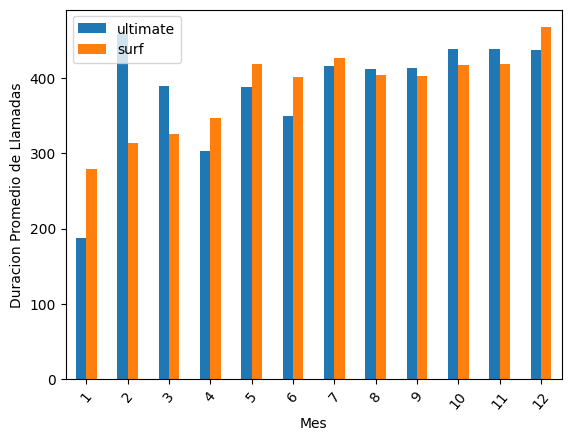

In [52]:
comparacion.plot(kind ='bar', ylabel= 'Duracion Promedio de Llamadas', xlabel= 'Mes', rot=50)

In [53]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# Agrupar duración total de llamadas por usuario y mes
duracion_mensual = df_calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
# Redondear los minutos hacia arriba
duracion_mensual['duration'] = np.ceil(duracion_mensual['duration'])
duracion_mensual

,user_id,month,duration
0,1000,12,117.0
1,1001,8,172.0
2,1001,9,298.0
3,1001,10,375.0
4,1001,11,405.0
...,...,...,...
2253,1498,12,325.0
2254,1499,9,331.0
2255,1499,10,364.0
2256,1499,11,289.0


In [54]:
# Unir con el DataFrame de usuarios para saber a qué plan pertenece cada usuario
duracion_mensual = duracion_mensual.merge(df_users[['user_id', 'plan']], on='user_id', how='left')
duracion_mensual


,user_id,month,duration,plan
0,1000,12,117.0,ultimate
1,1001,8,172.0,surf
2,1001,9,298.0,surf
3,1001,10,375.0,surf
4,1001,11,405.0,surf
...,...,...,...,...
2253,1498,12,325.0,surf
2254,1499,9,331.0,surf
2255,1499,10,364.0,surf
2256,1499,11,289.0,surf


In [55]:
# Separar los datos por tipo de plan
surf1 = duracion_mensual[duracion_mensual['plan'] == 'surf']['duration']
ultimate1 = duracion_mensual[duracion_mensual['plan'] == 'ultimate']['duration']

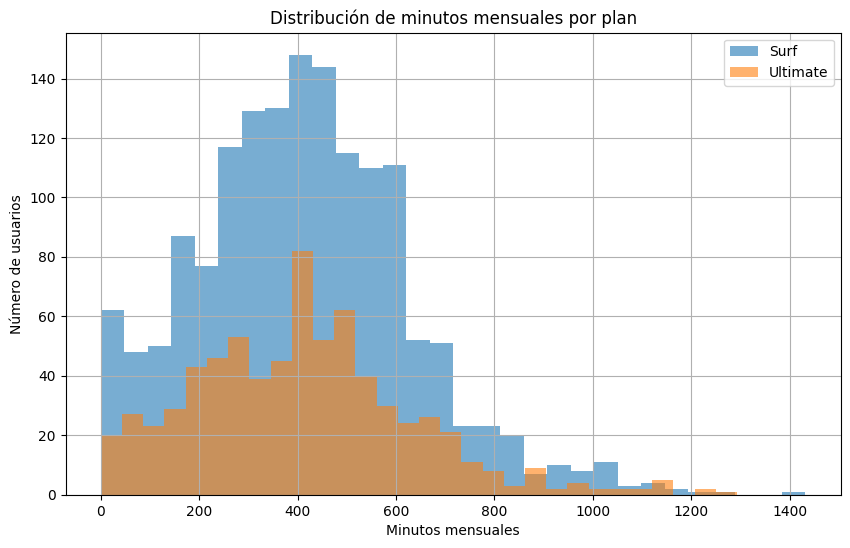

In [56]:
# Crear el histograma
plt.figure(figsize=(10,6))
plt.hist(surf1, bins=30, alpha=0.6, label='Surf')
plt.hist(ultimate1, bins=30, alpha=0.6, label='Ultimate')
plt.title('Distribución de minutos mensuales por plan')
plt.xlabel('Minutos mensuales')
plt.ylabel('Número de usuarios')
plt.legend()
plt.grid(True)
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [57]:
# Calcula la media y la varianza de la duración mensual de llamadas.
ultimate_mean = ultimate.groupby('month')['minutos_usados'].mean()
ultimate_mean

ultimate_var = ultimate.groupby('month')['minutos_usados'].var()
ultimate_var

calculo = pd.concat([ultimate_mean, ultimate_var], axis=1)
calculo.columns = ['mean','var']
calculo

,mean,var
month,,
1,187.453333,22376.587433
2,458.316000,59004.345680
3,389.648571,53331.785381
4,303.301250,36280.868692
5,387.340952,49426.122669
6,349.536757,35334.114628
7,415.912979,72298.842704
8,411.488246,52808.925215
9,413.126479,57056.019895


In [58]:
# Calcula la media y la varianza de la duración mensual de llamadas.
surf_mean = surf.groupby('month')['minutos_usados'] .mean()
surf_mean

surf_var = surf.groupby('month')['minutos_usados'] .var()
surf_var

calculo_2 = pd.concat([surf_mean, surf_var], axis=1)
calculo_2.columns = ['mean','var']
calculo_2

,mean,var
month,,
1,278.850000,NaN
2,313.240000,90934.192950
3,324.985625,38165.741733
4,346.206286,56226.026948
5,418.675283,55324.752668
6,401.525429,43182.147964
7,426.454382,57923.159823
8,404.183950,48244.970507
9,402.010068,41696.916513


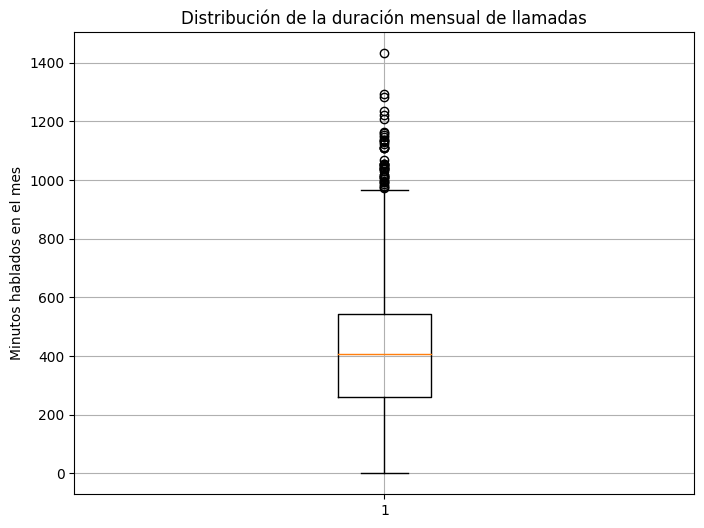

In [59]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

# Agrupar por usuario y mes sumando la duración de llamadas
duracion_mensual = df_calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()

# Redondear hacia arriba los minutos, como se haría al facturarlos
duracion_mensual['duration'] = np.ceil(duracion_mensual['duration'])

# Graficar el diagrama de caja
plt.figure(figsize=(8,6))
plt.boxplot(duracion_mensual['duration'])
plt.title('Distribución de la duración mensual de llamadas')
plt.ylabel('Minutos hablados en el mes')
plt.grid(True)
plt.show()


La mayor parte de los usuarios tiene un uso dentro de un rango concentrado (el cuerpo de la caja). Hay algunos valores atípicos que representan usuarios que hicieron llamadas muy largas o muchas llamadas en ciertos meses. El diagrama permite visualizar la mediana, el rango intercuartílico (IQR) y los extremos del comportamiento en minutos hablados.

### Mensajes

In [60]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

# Agrupar duración total de mensajes por usuario y mes
num_msj = tabla_completa.groupby(['user_id', 'n_msj', 'month'])['plan'].sum().reset_index()
num_msj

,user_id,n_msj,month,plan
0,1000,11,12,ultimate
1,1001,30,8,surf
2,1001,36,11,surf
3,1001,44,9,surf
4,1001,44,12,surf
...,...,...,...,...
1754,1496,11,12,surf
1755,1496,13,11,surf
1756,1496,18,10,surf
1757,1496,21,9,surf


In [61]:
num_msj_ultimate = num_msj[num_msj ['plan'] == 'ultimate']['n_msj']
num_msj_ultimate.name = 'msj_ultimate'
num_msj_ultimate


0        11
19       15
20      139
26       21
27       26
       ... 
1714     17
1718      5
1719     87
1730     66
1758     50
Name: msj_ultimate, Length: 579, dtype: int64

In [62]:
num_msj_surf = num_msj[num_msj ['plan'] == 'surf']['n_msj']
num_msj_surf.name = 'msj_surf'
num_msj_surf


1       30
2       36
3       44
4       44
5       53
        ..
1753     2
1754    11
1755    13
1756    18
1757    21
Name: msj_surf, Length: 1180, dtype: int64

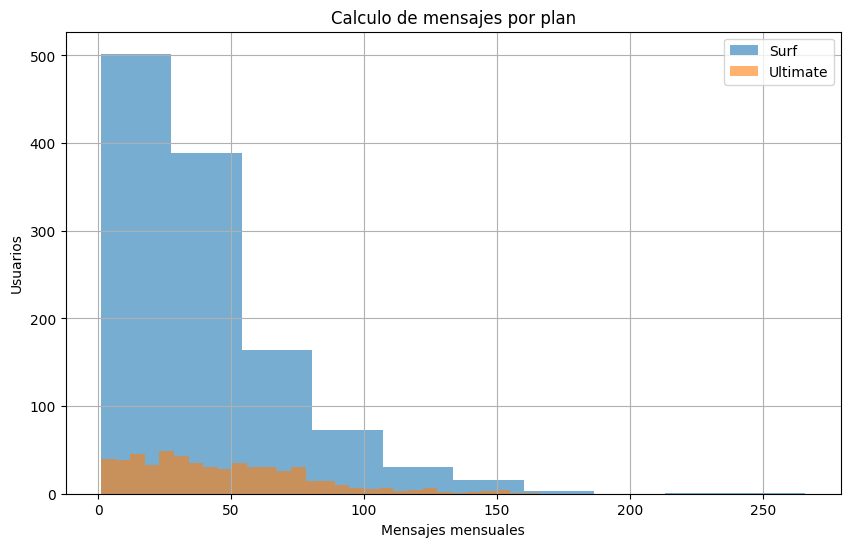

In [63]:
plt.figure(figsize=(10,6))
plt.hist(num_msj_surf, bins=10, alpha=0.6, label='Surf')
plt.hist(num_msj_ultimate, bins=30, alpha=0.6, label='Ultimate')
plt.title('Calculo de mensajes por plan')
plt.xlabel('Mensajes mensuales')
plt.ylabel('Usuarios')
plt.legend()
plt.grid(True)
plt.show()



Los usuarios del plan Surf envían menos mensajes envían, probablemente porque es un plan más barato o con menor beneficio en mensajes.
Los usuarios del plan Ultimate a simple vista se pudiera decir envían más mensajes.
Probablemente porque el plan tiene mensajes con un límite mas amplio, lo que permite mayor uso.
Ultimate tiene una distribución más extendida y plana, mientras que Surf está muy concentrado en bajos valores.

### Internet

In [64]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
trafico_mensual = df_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
trafico_mensual

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


In [65]:
# Unir con el dataframe de usuarios para saber el plan
trafico_mensual2 = trafico_mensual.merge(df_users[['user_id', 'plan']], on='user_id', how='left')
trafico_mensual2

,user_id,month,mb_used,plan
0,1000,12,1901.47,ultimate
1,1001,8,6919.15,surf
2,1001,9,13314.82,surf
3,1001,10,22330.49,surf
4,1001,11,18504.30,surf
...,...,...,...,...
2272,1498,12,23137.69,surf
2273,1499,9,12984.76,surf
2274,1499,10,19492.43,surf
2275,1499,11,16813.83,surf


In [66]:
# Filtrar el plan Surf y seleccionar la columna
trafico_surf = trafico_mensual2[trafico_mensual2['plan'] == 'surf'][['mb_used']]

# Cambiar de nombre a la columna
trafico_surf = trafico_surf.rename(columns={'mb_used': 'gb_used_surf'})

# Convertir de MB a GB redondeando hacia arriba
trafico_surf['gb_used_surf'] = np.ceil(trafico_surf['gb_used_surf'] / 1024)

trafico_surf


,gb_used_surf
1,7.0
2,14.0
3,22.0
4,19.0
5,19.0
...,...
2272,23.0
2273,13.0
2274,20.0
2275,17.0


In [67]:
# Filtrar el plan Ultimate y seleccionar la columna
trafico_ultimate = trafico_mensual2[trafico_mensual2['plan'] == 'ultimate'][['mb_used']]

# Cambiar de nombre a la columna
trafico_ultimate = trafico_ultimate.rename(columns={'mb_used': 'gb_used_ultimate'})

# Convertir de MB a GB redondeando hacia arriba
trafico_ultimate['gb_used_ultimate'] = np.ceil(trafico_ultimate['gb_used_ultimate'] / 1024)

trafico_ultimate

,gb_used_ultimate
0,2.0
19,3.0
20,32.0
26,17.0
27,24.0
...,...
2242,15.0
2243,16.0
2244,16.0
2245,15.0


In [68]:
trafico_ultimate = trafico_ultimate.reset_index(drop=True)
trafico_surf = trafico_surf.reset_index(drop=True)
internet = pd.concat([trafico_surf, trafico_ultimate], axis=1)
internet


,gb_used_surf,gb_used_ultimate
0,7.0,2.0
1,14.0,3.0
2,22.0,32.0
3,19.0,17.0
4,19.0,24.0
...,...,...
1553,23.0,NaN
1554,13.0,NaN
1555,20.0,NaN
1556,17.0,NaN


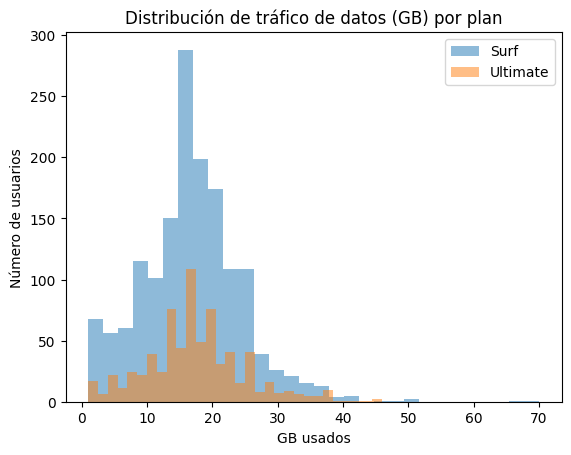

In [69]:
plt.hist(trafico_surf['gb_used_surf'], bins=30, alpha=0.5, label='Surf')
plt.hist(trafico_ultimate['gb_used_ultimate'], bins=30, alpha=0.5, label='Ultimate')
plt.title('Distribución de tráfico de datos (GB) por plan')
plt.xlabel('GB usados')
plt.ylabel('Número de usuarios')
plt.legend()
plt.show()

El plan Surf tiene un pico muy pronunciado en alrededor de 20 GB, lo cual podría indicar que muchos usuarios están alcanzando un límite de datos que impone ese plan.

El plan Ultimate, en cambio, muestra un comportamiento más disperso y estable, lo que sugiere que los usuarios hacen uso libre del tráfico sin preocuparse tanto por el límite.

Ambos planes tienen usuarios que pueden llegar hasta los 50-60 GB, aunque es mucho más raro y solo ocurre en algunos casos.

## Ingreso

In [70]:
df_uso

,user_id,month,minutos_usados,n_msj,mb_usados,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,minutos_extra,mensajes_extra,mb_extra,gb_extra,costo_total
0,1000,12,117.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,0.0,0.0,0.00,0.0,70.00
1,1001,8,172.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,surf,0.0,0.0,0.00,0.0,20.00
2,1001,9,298.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,surf,0.0,0.0,0.00,0.0,20.00
3,1001,10,375.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,surf,0.0,3.0,6970.49,7.0,90.09
4,1001,11,405.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,surf,0.0,0.0,3144.30,4.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,61.0,13039.91,surf,50,15360,500,20,10,0.03,0.03,surf,0.0,11.0,0.00,0.0,20.33
2289,1361,5,0.0,2.0,1519.69,surf,50,15360,500,20,10,0.03,0.03,surf,0.0,0.0,0.00,0.0,20.00
2290,1482,10,0.0,2.0,0.00,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,0.0,0.0,0.00,0.0,70.00
2291,1108,12,0.0,0.0,233.17,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,0.0,0.0,0.00,0.0,70.00


[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [71]:
# Compara la cantidad de Ingreso por usuarios por plan
ingreso_mensual = df_uso.groupby(['user_id', 'month', 'plan'])['costo_total'].sum().reset_index()
ingreso_mensual

,user_id,month,plan,costo_total
0,1000,12,ultimate,70.00
1,1001,8,surf,20.00
2,1001,9,surf,20.00
3,1001,10,surf,90.09
4,1001,11,surf,60.00
...,...,...,...,...
2288,1498,12,surf,100.00
2289,1499,9,surf,20.00
2290,1499,10,surf,70.00
2291,1499,11,surf,40.00


In [72]:
ingreso_surf = ingreso_mensual[ingreso_mensual['plan'] == 'surf']['costo_total']
ingreso_surf.name = 'ingreso_surf'
ingreso_surf

1        20.00
2        20.00
3        90.09
4        60.00
5        60.00
         ...  
2288    100.00
2289     20.00
2290     70.00
2291     40.00
2292     90.00
Name: ingreso_surf, Length: 1573, dtype: float64

In [73]:
ingreso_ultimate = ingreso_mensual[ingreso_mensual['plan'] == 'ultimate']['costo_total']
ingreso_ultimate.name = 'ingreso_ultimate'
ingreso_ultimate

0       70.0
19      70.0
20      84.0
26      70.0
27      70.0
        ... 
2258    70.0
2259    70.0
2260    70.0
2261    70.0
2277    70.0
Name: ingreso_ultimate, Length: 720, dtype: float64

In [74]:
ingresos_surf = ingreso_surf.sum()
ingresos_surf

94902.13

In [75]:
ingresos_ultimate = ingreso_ultimate.sum()
ingresos_ultimate

52066.0

Como se puede apreciar el ingreso mensual del plan surf es mayor que el ingreso mensual de ultimate esto pudiera ser por que es mas accesible para mayor población este plan.

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [80]:
# Agrupar datos por usuario y mes
trafico = df_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
llamadas = df_calls.groupby(['user_id', 'month'])['duration'].sum().apply(np.ceil).reset_index(name='minutos_usados')
mensajes = df_messages.groupby(['user_id', 'month'])['id'].count().reset_index(name='n_msj')

# Unir datos de tráfico, llamadas y mensajes
df_uso = pd.merge(trafico, llamadas, on=['user_id', 'month'], how='outer')
df_uso = pd.merge(df_uso, mensajes, on=['user_id', 'month'], how='outer')
df_uso = df_uso.fillna(0)

# Unir con datos de usuarios y planes
df_uso = pd.merge(df_uso, df_users[['user_id', 'plan']], on='user_id', how='left')
df_uso = pd.merge(df_uso, df_plans, left_on='plan', right_on='plan_name', how='left')

# Calcular excedentes
df_uso['minutos_extra'] = np.maximum(0, df_uso['minutos_usados'] - df_uso['minutes_included'])
df_uso['mensajes_extra'] = np.maximum(0, df_uso['n_msj'] - df_uso['messages_included'])
df_uso['mb_extra'] = np.maximum(0, df_uso['mb_used'] - df_uso['mb_per_month_included'])
df_uso['gb_extra'] = np.ceil(df_uso['mb_extra'] / 1024)

# Calcular ingresos mensuales por usuario
df_uso['costo_total'] = (
    df_uso['usd_monthly_pay'] +
    df_uso['minutos_extra'] * df_uso['usd_per_minute'] +
    df_uso['mensajes_extra'] * df_uso['usd_per_message'] +
    df_uso['gb_extra'] * df_uso['usd_per_gb']
).round(2)

# Separar ingresos por plan
ingresos_surf = df_uso[df_uso['plan'] == 'surf']['costo_total']
ingresos_ultimate = df_uso[df_uso['plan'] == 'ultimate']['costo_total']

# Realizar la prueba t para dos muestras independientes
resultado = st.ttest_ind(ingresos_surf, ingresos_ultimate, equal_var=False)  # No asumimos varianzas iguales
p_value = resultado.pvalue

# Mostrar el p-valor
print('p-valor:', p_value)

# Interpretación del resultado
if p_value < 0.05:
    print('Rechazamos la hipótesis nula: hay una diferencia significativa en los ingresos promedio entre los planes.')
else:
    print('No se rechaza la hipótesis nula: no hay diferencia significativa en los ingresos promedio entre los planes.')



p-valor: 3.6278039040985444e-16
Rechazamos la hipótesis nula: hay una diferencia significativa en los ingresos promedio entre los planes.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [78]:

# Agrupar datos por usuario y mes
trafico = df_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
llamadas = df_calls.groupby(['user_id', 'month'])['duration'].sum().apply(np.ceil).reset_index(name='minutos_usados')
mensajes = df_messages.groupby(['user_id', 'month'])['id'].count().reset_index(name='n_msj')

# Unir datos de tráfico, llamadas y mensajes
df_uso = pd.merge(trafico, llamadas, on=['user_id', 'month'], how='outer')
df_uso = pd.merge(df_uso, mensajes, on=['user_id', 'month'], how='outer')
df_uso = df_uso.fillna(0)

# Agregar datos de usuarios y planes
df_uso = pd.merge(df_uso, df_users[['user_id', 'plan', 'city']], on='user_id', how='left')
df_uso = pd.merge(df_uso, df_plans, left_on='plan', right_on='plan_name', how='left')

# Calcular excedentes
df_uso['minutos_extra'] = np.maximum(0, df_uso['minutos_usados'] - df_uso['minutes_included'])
df_uso['mensajes_extra'] = np.maximum(0, df_uso['n_msj'] - df_uso['messages_included'])
df_uso['mb_extra'] = np.maximum(0, df_uso['mb_used'] - df_uso['mb_per_month_included'])
df_uso['gb_extra'] = np.ceil(df_uso['mb_extra'] / 1024)

# Calcular ingresos mensuales por usuario
df_uso['costo_total'] = (
    df_uso['usd_monthly_pay'] +
    df_uso['minutos_extra'] * df_uso['usd_per_minute'] +
    df_uso['mensajes_extra'] * df_uso['usd_per_message'] +
    df_uso['gb_extra'] * df_uso['usd_per_gb']
).round(2)

# Separar ingresos para NY-NJ y otras ciudades
ny_nj = df_uso[df_uso['city'].str.contains('NY-NJ', na=False)]['costo_total']
otras_ciudades = df_uso[~df_uso['city'].str.contains('NY-NJ', na=False)]['costo_total']

# Prueba t de dos muestras independientes
resultado = st.ttest_ind(ny_nj, otras_ciudades, equal_var=False)  # No asumimos varianzas iguales
p_value = resultado.pvalue

# Mostrar el p-valor
print('p-valor:', p_value)

# Interpretación automática
if p_value < 0.05:
    print('Rechazamos la hipótesis nula: hay una diferencia significativa en los ingresos promedio entre NY-NJ y otras regiones.')
else:
    print('No se rechaza la hipótesis nula: no hay diferencia significativa en los ingresos promedio entre NY-NJ y otras regiones.')


p-valor: 0.031237788444585222
Rechazamos la hipótesis nula: hay una diferencia significativa en los ingresos promedio entre NY-NJ y otras regiones.


## Conclusión general

En conclusión general fue un gran desafío, la verdad en este proyecto si hubo buenos retos por que si fue mucho analisis y concentración aparte que no lo pude hacer seguido por cuestiones laborales cuando lo retomaba ya se me habia olvidado que hice y era darle otra repasada y muchas de las veces no me acordaba por que habia hecho lo que habia hecho, aparte tuve que realizar muchos merge y  lo mas desafiante para mi fue hacer las hipotesis por que todavia no les entiendo bien 